### As2 

(need to upload data....)


In [1]:
import pandas as pd
import numpy as np

data_df = pd.read_csv('dataforass2.csv')
data_df = data_df.sort_values(by=['Date'])


un_dates = data_df.Date.unique()
dates15 = un_dates[-365:]

for x in un_dates:
    if x.startswith('2015'):
        #print(x)
        un_dates = np.delete(un_dates, np.argwhere(un_dates == x))

    elif x.endswith('02-29'):
        #print(x)
        un_dates = np.delete(un_dates, np.argwhere(un_dates == x))
        
#print(len(un_dates)) # -> 3650
col = ['Day', 'Min', 'Max', '2015_min', '2015_max']
final_data = pd.DataFrame(columns = col)
 
final_data['Day'] = dates15
final_data['Day'] = final_data['Day'].str.replace('2015-', '')

# not very fast but it works xD
for i in range(len(final_data)):
    final_data['Max'][i] = data_df[data_df['Date'].str.endswith(final_data['Day'][i])
                            & ~(data_df['Date'].str.startswith('2015'))
                            & (data_df['Element'] == 'TMAX')]['Data_Value'].max()
    
    final_data['Min'][i] = data_df[data_df['Date'].str.endswith(final_data['Day'][i])
                            & ~(data_df['Date'].str.startswith('2015'))
                            & (data_df['Element'] == 'TMIN')]['Data_Value'].min()
    
    datestring = '2015-' + final_data['Day'][i]
    min_15 = data_df[(data_df['Date'] == datestring) & (data_df['Element'] == 'TMIN')]['Data_Value'].min()
    max_15 = data_df[(data_df['Date'] == datestring) & (data_df['Element'] == 'TMAX')]['Data_Value'].max()
    
    if (min_15 < final_data['Min'][i]):
        final_data['2015_min'][i] = min_15
        
    if (max_15 > final_data['Max'][i]):
        final_data['2015_max'][i] = max_15
        
    #print('Value ', str(i), ' of ', str(len(final_data)))

    
final_data['Min'] = pd.to_numeric(final_data['Min'], errors='ignore')
final_data['Max'] = pd.to_numeric(final_data['Max'], errors='ignore')
final_data['2015_min'] = pd.to_numeric(final_data['2015_min'], errors='ignore')
final_data['2015_max'] = pd.to_numeric(final_data['2015_max'], errors='ignore')


final_data['Min'] = final_data['Min']/10
final_data['Max'] = final_data['Max']/10
final_data['2015_min'] = final_data['2015_min']/10
final_data['2015_max'] = final_data['2015_max']/10



#final_data.head()

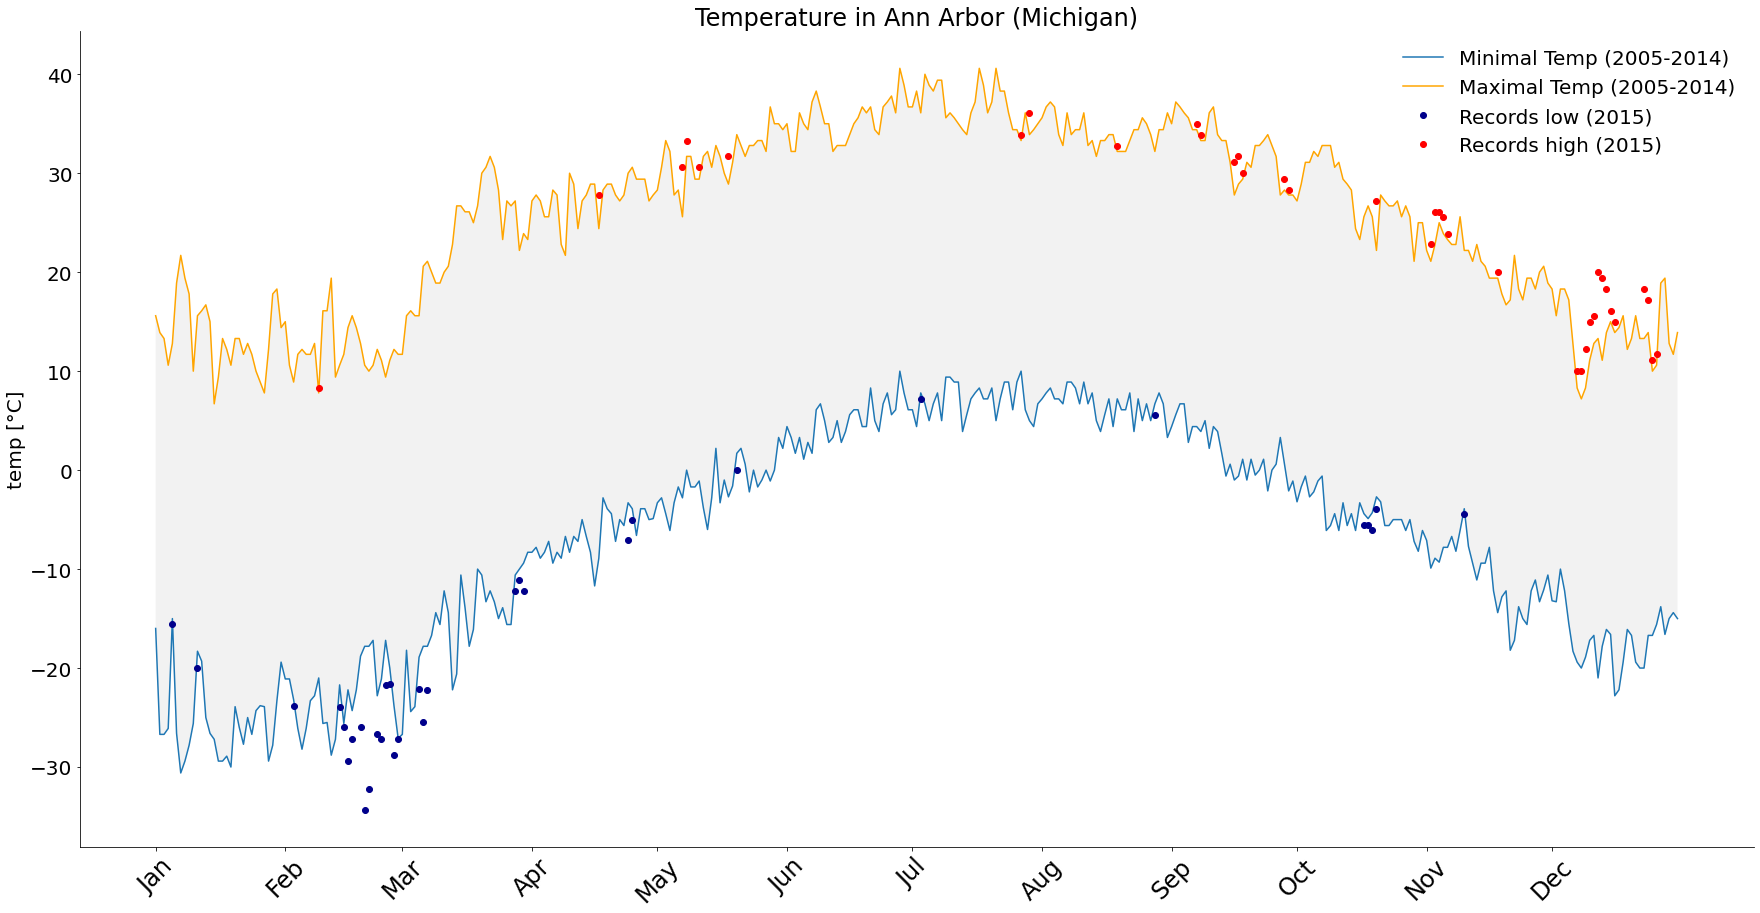

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.artist import Artist


plt.figure()
plt.plot(final_data['Min'], '-')
plt.plot(final_data['Max'], '-', color='orange')
plt.plot(final_data['2015_min'], 'o', color='darkblue')
plt.plot(final_data['2015_max'], 'o', color='red')

plt.fill_between(final_data.index, final_data['Max'], final_data['Min'], facecolor='gray', alpha=0.1)

mpl.rcParams['figure.figsize'] = [30, 15]
plt.rcParams.update({'font.size': 20})

plt.ylabel('temp [°C]')
plt.title('Temperature in Ann Arbor (Michigan)')
plt.legend(['Minimal Temp (2005-2014)', 'Maximal Temp (2005-2014)', 'Records low (2015)', 'Records high (2015)'], frameon=False)


x = plt.gca().xaxis
x.set_ticks([0,31,59,90,120,151,181,212,243,273,304,334])
x.set_ticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], size='large')
for item in x.get_ticklabels():
    item.set_rotation(45)
    
for pos in ['right', 'top']:
    plt.gca().spines[pos].set_visible(False)

plt.savefig('plot.png')
plt.show()